In [1]:
# Установка библиотек
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00


In [5]:
import pandas as pd

# Считываем CSV
df = pd.read_csv('model_data.csv', sep=';')

# Проверяем типы данных
print(df.dtypes)

Запрашиваемая сумма      float64
Дата подачи заявки        object
Назначение кредита        object
Кредитный рейтинг        float64
Долговая нагрузка (%)    float64
Почтовый индекс           object
Штат                      object
Срок занятости            object
Default                    int64
dtype: object


In [6]:
df['Дата подачи заявки'] = pd.to_datetime(df['Дата подачи заявки'], errors='coerce')

In [7]:
df

,Запрашиваемая сумма,Дата подачи заявки,Назначение кредита,Кредитный рейтинг,Долговая нагрузка (%),Почтовый индекс,Штат,Срок занятости,Default
0,1000.0,2016-01-04,moving,628.0,21.43,380xx,TN,< 1 year,0
1,25000.0,2016-01-04,other,727.0,18.88,038xx,NH,< 1 year,0
2,30000.0,2016-01-04,debt_consolidation,786.0,44.64,967xx,HI,< 1 year,0
3,6000.0,2016-01-04,major_purchase,502.0,6.68,762xx,TN,< 1 year,1
4,1500.0,2016-01-04,vacation,604.0,10.94,350xx,AL,< 1 year,0
...,...,...,...,...,...,...,...,...,...
48495,10000.0,NaT,debt_consolidation,621.0,68.79,770xx,TX,< 1 year,0
48496,4000.0,NaT,other,588.0,0.00,302xx,GA,< 1 year,1
48497,17000.0,NaT,credit_card,600.0,23.77,072xx,NJ,< 1 year,0
48498,30000.0,NaT,small_business,622.0,21.42,972xx,OR,< 1 year,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48500 entries, 0 to 48499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Запрашиваемая сумма    48500 non-null  float64       
 1   Дата подачи заявки     25325 non-null  datetime64[ns]
 2   Назначение кредита     48500 non-null  object        
 3   Кредитный рейтинг      48500 non-null  float64       
 4   Долговая нагрузка (%)  48500 non-null  float64       
 5   Почтовый индекс        48500 non-null  object        
 6   Штат                   48500 non-null  object        
 7   Срок занятости         48500 non-null  object        
 8   Default                48500 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.3+ MB


In [9]:
#проверка на наличие нулевых значений
df.isna().sum().sum()/len(df)

np.float64(0.4778350515463918)

In [10]:
#отбрасывание нулевых значений
df.dropna(inplace=True)

In [11]:
#проверка на наличие нулевых значений
df.isna().sum().sum()/len(df)

np.float64(0.0)


Пропуски до обработки:
loan_amount          0
application_date     0
loan_purpose         0
credit_rating        0
debt_load            0
postal_code          0
state                0
employment_length    0
default              0
dtype: int64


<ipython-input-14-354870896f89>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['credit_rating'].fillna(df['credit_rating'].median(), inplace=True)
<ipython-input-14-354870896f89>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 


Оценка модели:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4136
           1       1.00      1.00      1.00       929

    accuracy                           1.00      5065
   macro avg       1.00      1.00      1.00      5065
weighted avg       1.00      1.00      1.00      5065

ROC-AUC: 1.0


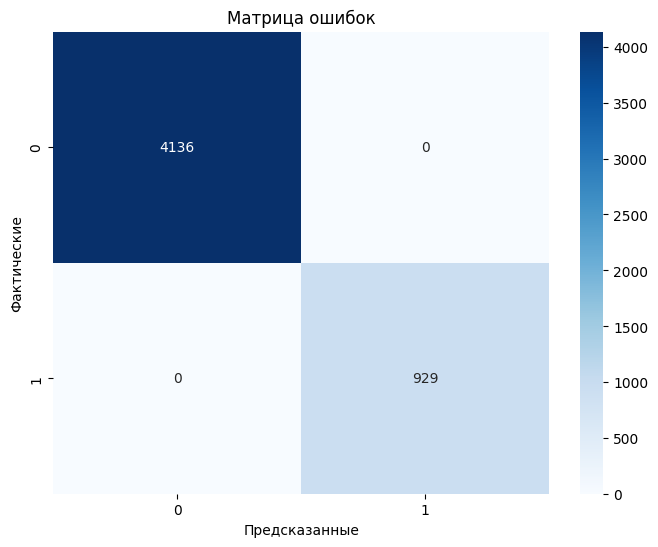

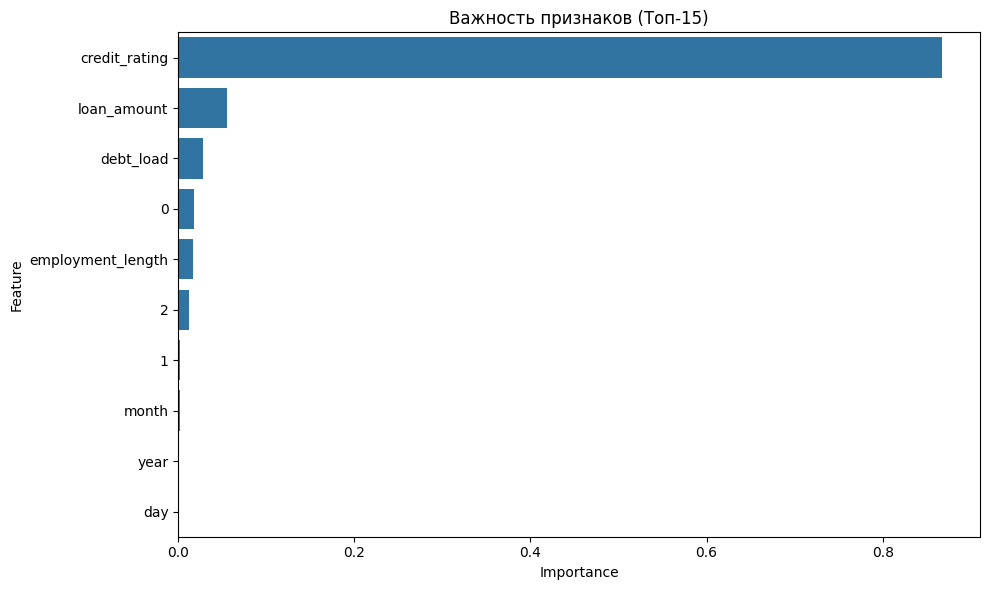

Модель сохранена как 'loan_default_model.pkl'


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce


# Шаг 3: Предварительная обработка данных
# Переименование столбцов для удобства
df.columns = [
    'loan_amount', 'application_date', 'loan_purpose', 'credit_rating',
    'debt_load', 'postal_code', 'state', 'employment_length', 'default'
]

# Обработка пропусков
print("\nПропуски до обработки:")
print(df.isnull().sum())

# Заполнение пропусков в кредитном рейтинге
df['credit_rating'].fillna(df['credit_rating'].median(), inplace=True)

# Преобразование даты
df['application_date'] = pd.to_datetime(df['application_date'], format='%d.%m.%Y')
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month
df['day'] = df['application_date'].dt.day

# Обработка аномальных значений в debt_load
df['debt_load'] = df['debt_load'].replace([9999.0, 99999.0, -1.0], np.nan)
df['debt_load'].fillna(df['debt_load'].median(), inplace=True)

# Преобразование employment_length в числовой признак
employment_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['employment_length'] = df['employment_length'].map(employment_mapping).fillna(0.5)

# Извлечение региона из почтового индекса
df['postal_region'] = df['postal_code'].str[:3]

# Шаг 4: Разделение данных
X = df.drop(['default', 'application_date', 'postal_code'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Шаг 5: Создание конвейера обработки данных
# Определение столбцов по типам
categorical_features = ['loan_purpose', 'state', 'postal_region']
numerical_features = [
    'loan_amount', 'credit_rating', 'debt_load',
    'employment_length', 'year', 'month', 'day'
]

# Препроцессинг для числовых данных
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Препроцессинг для категориальных данных
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.TargetEncoder())
])

# Объединение преобразований
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Шаг 6: Создание и обучение модели
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ))
])

model.fit(X_train, y_train)

# Шаг 7: Оценка модели
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nОценка модели:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные')
plt.ylabel('Фактические')
plt.title('Матрица ошибок')
plt.show();

# Шаг 8: Анализ важности признаков
# Извлечение обученной модели
rf_model = model.named_steps['classifier']

# Получение имен признаков после преобразования
feature_names = numerical_features + list(model.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['encoder']
    .get_feature_names_out()
)

# Сортировка важности признаков
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(15))
plt.title('Важность признаков (Топ-15)')
plt.tight_layout()
plt.show();

# Шаг 9: Сохранение модели (опционально)
import joblib
joblib.dump(model, 'loan_default_model.pkl')
print("Модель сохранена как 'loan_default_model.pkl'")

loan_amount — запрашиваемая сумма кредита

risk_score — кредитный скоринг

dti_ratio — долговая нагрузка (%)

loan_purpose — цель кредита

state — штат проживания

emp_length — срок занятости

In [15]:
model = joblib.load('loan_default_model.pkl')

In [22]:
def get_user_input():
    print("Введите данные заемщика:")
    loan_amount = input("Запрашиваемая сумма: ")
    app_date = input("Дата подачи заявки (dd.mm.yyyy): ")
    loan_purpose = input("Цель кредита: ")
    risk_score = input("Кредитный скоринг: ")
    dti_ratio = input("Долговая нагрузка (%): ")
    zip_code = input("Почтовый индекс: ")
    state = input("Штат: ")
    emp_length = input("Срок занятости: ")

    # Формируем DataFrame
    user_df = pd.DataFrame([[
        loan_amount, app_date, loan_purpose, risk_score,
        dti_ratio, zip_code, state, emp_length
    ]], columns=[
        "loan_amount", "app_date", "loan_purpose", "risk_score",
        "dti_ratio", "zip_code", "state", "emp_length"
    ])

    return user_df

user_input = get_user_input()

# Обработка даты
user_input['app_date'] = pd.to_datetime(user_input['app_date'], errors='coerce')
user_input['year'] = user_input['app_date'].dt.year
user_input['day'] = user_input['app_date'].dt.day
user_input['month'] = user_input['app_date'].dt.month

# Числовые колонки
user_input['loan_amount'] = pd.to_numeric(user_input['loan_amount'], errors='coerce')
user_input['risk_score'] = pd.to_numeric(user_input['risk_score'], errors='coerce')
user_input['dti_ratio'] = user_input['dti_ratio'].str.replace('%', '').astype(float)

# Извлечение региона из почтового индекса
user_input['postal_region'] = user_input['zip_code'].str[:3]

# Преобразование employment_length
employment_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
user_input['employment_length'] = user_input['emp_length'].map(employment_mapping).fillna(0.5)

# Список всех нужных признаков
model_features = [
    'credit_rating', 'debt_load', 'postal_region', 'day', 'employment_length',
    'loan_amount', 'month', 'loan_purpose', 'state', 'year', 'risk_score', 'dti_ratio'
]

# Добавляем недостающие колонки
for col in model_features:
    if col not in user_input.columns:
        if col in ['credit_rating', 'debt_load', 'loan_amount', 'risk_score', 'dti_ratio']:
            user_input[col] = 0
        elif col in ['postal_region', 'employment_length', 'loan_purpose', 'state']:
            user_input[col] = 'unknown'
        elif col in ['day', 'month', 'year']:
            user_input[col] = 1

# Выбираем нужные признаки
user_input_features = user_input[model_features]

# Предсказание
user_input_encoded = model.named_steps['preprocessor'].transform(user_input_features)
pred = model.named_steps['classifier'].predict(user_input_encoded)
prob = model.named_steps['classifier'].predict_proba(user_input_encoded)[:, 1]

print(f"\nПредсказание: {'Дефолт' if pred[0] == 1 else 'Без дефолта'}")
print(f"Вероятность дефолта: {prob[0]:.2%}")

Введите данные заемщика:
Запрашиваемая сумма: 25000
Дата подачи заявки (dd.mm.yyyy): 12.04.2016
Цель кредита: debt_consolidation
Кредитный скоринг: 650
Долговая нагрузка (%): 18.5
Почтовый индекс: 921xx
Штат: CA
Срок занятости: < 1 year

Предсказание: Дефолт
Вероятность дефолта: 98.69%


Введите данные заемщика для прогноза риска дефолта:

Запрашиваемая сумма: 25000

Дата подачи заявки (dd.mm.yyyy): 12.04.2016

Назначение кредита (например, debt_consolidation): debt_consolidation

Кредитный рейтинг: 650

Долговая нагрузка (%): 18.5

Почтовый индекс: 921xx

Штат проживания: CA

Срок занятости (< 1 year): < 1 year